<a href="https://colab.research.google.com/github/AlvielD/unibo_dl_2223/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory lesson 1 - Introduction to Deep Learning

## Libraries and config.

In [30]:
# Specific libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# General libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Check some data of the GPU (NEED TO HAVE THE HARDWARE ACCELERATION ACTIVATED)
!nvidia-smi

Wed Mar  8 16:28:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Data loading

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Inspect dataset

In [24]:
# Check shape of the datasets
print("Traing dataset:")
print(f"- X -> {x_train.shape}")
print(f"- Y -> {y_train.shape}")

print("Test dataset:")
print(f"- X -> {x_test.shape}")
print(f"- Y -> {y_test.shape}")

Traing dataset:
- X -> (60000, 28, 28)
- Y -> (60000,)
Test dataset:
- X -> (10000, 28, 28)
- Y -> (10000,)


In [25]:
# Check max and min values
print(f"Maximum value of the train dataset: {x_train.max()}")
print(f"Minimum value of the train dataset: {x_train.min()}")

Maximum value of the train dataset: 255
Minimum value of the train dataset: 0


## Preprocessing

In [26]:
# Define the function to normalize the data
normalize_data = lambda X: (X-X.min())/(X.max()-X.min())

# Apply function on the dataset
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

In [27]:
# Check max and min values AFTER APPLYING NORMALIZATION
print(f"Maximum value of the train dataset: {x_train.max()}")
print(f"Minimum value of the train dataset: {x_train.min()}")

Maximum value of the train dataset: 1.0
Minimum value of the train dataset: 0.0


In [28]:
# Labels of the dataset
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [29]:
# Perform one-hot-encoding with keras
print(f"Before encoding: {y_train[0]}")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"After encoding: {y_train[0]}")

Before encoding: 9
After encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model

### Sequential model

In [ ]:
"""
Define a sequential model with the following characteristics
  - Flatten input layer
  - Dense layer of 64 units
  - Output layer (also dense), needs to be 10 because of the number of labels we
    need to predict. We will define "softmax" as activation function.
"""
model = Sequential([Flatten(), Dense(64), Dense(10, activation="softmax")])

### Functional model

In [34]:
def build_model(input_shape, output_shape):
  """
  Function that defines a model, this way, we can re-instantiate the
  model each time we need to modify it.

  Parameters
  ----------
  input_shape : np.shape
    shape of the input layer
  output_shape : np.shape
    shape of the output layer

  Returns
  -------
  model
    the built model
  """

  # Define the layers of the model
  input = Input(input_shape)  # Input layer
  flatten = Flatten()(input)  # Flatten layer (28x28) -> (784)

  dense_1 = Dense(64, activation='relu')(flatten)# Hidden layer with 64 units
  dense_2 = Dense(output_shape, activation='softmax')(dense_1) # Output layer with softmax

  model = Model(inputs=input, outputs=dense_2)  # Build model
  model.summary() # Print summary of the model

  return model


In [46]:
model = build_model((28, 28), 10)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics='accuracy')

In [48]:
# Train the model on the training set using 10 epochs and a 10% of the data for validation
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5345 - accuracy: 0.8146 - val_loss: 0.5173 - val_accuracy: 0.8110
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4019 - accuracy: 0.8577 - val_loss: 0.3863 - val_accuracy: 0.8578
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3596 - accuracy: 0.8704 - val_loss: 0.3763 - val_accuracy: 0.8675
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8777 - val_loss: 0.3569 - val_accuracy: 0.8700
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3167 - accuracy: 0.8853 - val_loss: 0.3554 - val_accuracy: 0.8720
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3030 - accuracy: 0.8886 - val_loss: 0.3362 - val_accuracy: 0.8795
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2921 - accuracy: 0.8925 - val_loss: 0.3391 - val_accuracy:

In [49]:
# Evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8779


[0.35278406739234924, 0.8779000043869019]

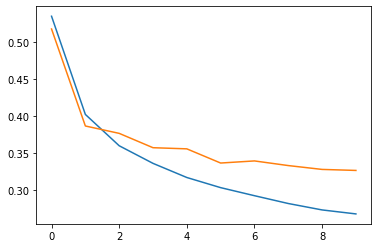

In [50]:
# Plot a history of the loss vs the val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Early Stopping

In [51]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.
